In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

<Item title:"SAC_Tree_Survival" type:Feature Layer Collection owner:Anooshi>
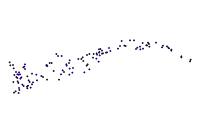

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('b8830c4065c947f1a97495f9509c5e93')

data = output['data0']
feature_service = output['feature_service']

In [3]:
oakhab = data.loc[data.Habitat != 'Sycamore Riparian']

In [22]:
oakhab.count()

AliveDead     837
BHRSite       837
BelowTT        63
Cankers        29
Comments      130
Confined       62
DeadLeaves     17
DeadPathog      1
DeerBrow      373
Depredated     68
DiedOlder       7
DiedYoung     210
Dormant         3
EnteringDo      8
ExcptRob        1
GlobalID      837
Habitat       837
HealthRank    404
InsectBrow     46
InsectInfe      0
LeafDiebac     37
LeafSpots     103
LeavesChlo     15
MainStmDeR     14
Missing       227
OBJECTID      837
Oozing          0
PlantStunt    201
PlotCntrMv      0
PlotDmnsnC      0
PlotID        837
PotentialP      4
PrematureL     13
RodentBrow      8
SHAPE         837
ShootBranc    172
StemDiebac     87
SurveyDate    837
Surveyor1     837
Surveyor2     656
TreeHeight    404
TreeShelte    812
TreeSpecie    837
Wilting         8
dtype: int64

In [32]:
deerbrow = oakhab[oakhab.DeerBrow.notnull()]

In [38]:
deerbrow.DeerBrow.count()/oakhab.AliveDead.count()

0.44563918757467147

In [4]:
oakhab

In [10]:
healthy = oakhab[oakhab.HealthRank == '1 - Plant healthy; no apparent afflictions or stress']

In [16]:
healthy.shape

(10, 44)

In [19]:
lesshealthy = oakhab[oakhab.HealthRank == '2 - Plant healthy; minor signs of affliction or stress']

In [20]:
lesshealthy.count()

AliveDead     133
BHRSite       133
BelowTT        26
Cankers         6
Comments       14
Confined       22
DeadLeaves      1
DeadPathog      0
DeerBrow      123
Depredated      0
DiedOlder       0
DiedYoung       3
Dormant         1
EnteringDo      2
ExcptRob        0
GlobalID      133
Habitat       133
HealthRank    133
InsectBrow     10
InsectInfe      0
LeafDiebac      4
LeafSpots      10
LeavesChlo      5
MainStmDeR      4
Missing         0
OBJECTID      133
Oozing          0
PlantStunt     55
PlotCntrMv      0
PlotDmnsnC      0
PlotID        133
PotentialP      1
PrematureL      1
RodentBrow      2
SHAPE         133
ShootBranc     27
StemDiebac     10
SurveyDate    133
Surveyor1     133
Surveyor2     109
TreeHeight    133
TreeShelte    133
TreeSpecie    133
Wilting         1
dtype: int64

In [4]:
alive = oakhab[oakhab.AliveDead == 'Alive']

In [5]:
oakhab.groupby('HealthRank').count()

,AliveDead,BHRSite,BelowTT,Cankers,Comments,Confined,DeadLeaves,DeadPathog,DeerBrow,Depredated,DiedOlder,DiedYoung,Dormant,EnteringDo,ExcptRob,GlobalID,Habitat,InsectBrow,InsectInfe,LeafDiebac,LeafSpots,LeavesChlo,MainStmDeR,Missing,OBJECTID,Oozing,PlantStunt,PlotCntrMv,PlotDmnsnC,PlotID,PotentialP,PrematureL,RodentBrow,SHAPE,ShootBranc,StemDiebac,SurveyDate,Surveyor1,Surveyor2,TreeHeight,TreeShelte,TreeSpecie,Wilting
HealthRank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 - Plant healthy; no apparent afflictions or stress,10,10,5,0,4,3,0,0,3,0,0,0,0,0,1,10,10,1,0,0,0,1,1,0,10,0,0,0,0,10,0,0,0,10,0,1,10,10,9,10,10,10,0
2 - Plant healthy; minor signs of affliction or stress,133,133,26,6,14,22,1,0,123,0,0,3,1,2,0,133,133,10,0,4,10,5,4,0,133,0,55,0,0,133,1,1,2,133,27,10,133,133,109,133,133,133,1
3 - Moderate health; moderate signs of affliction or stress,210,210,22,17,8,33,8,0,200,0,0,0,2,4,0,210,210,28,0,22,71,7,3,0,210,0,108,0,0,210,2,5,5,210,103,47,210,210,147,210,209,210,6
4 - Poor health; appears heavily afflicted or stressed,46,46,7,6,6,4,5,0,43,0,0,1,0,2,0,46,46,7,0,9,21,2,4,0,46,0,37,0,0,46,1,4,1,46,39,24,46,46,37,46,46,46,1
5 - Poor health; probable imminent mortality,5,5,3,0,0,0,3,0,3,0,0,0,0,0,0,5,5,0,0,2,1,0,2,0,5,0,1,0,0,5,0,3,0,5,3,5,5,5,2,5,5,5,0


In [13]:
alive.DeerBrow.value_counts()

Moderate    189
Heavy       138
Light        45
Name: DeerBrow, dtype: int64

In [16]:
alive.PlantStunt.value_counts()

Yes    201
Name: PlantStunt, dtype: int64

In [19]:
alivebrow = alive[alive.DeerBrow.notnull()]

In [21]:
alivebrow.shape

(372, 44)

In [22]:
alivebrow.PlantStunt.value_counts()

Yes    198
Name: PlantStunt, dtype: int64

In [23]:
198/372

0.532258064516129

In [27]:
alive.HealthRank.value_counts()

3 - Moderate health; moderate signs of affliction or stress    210
2 - Plant healthy; minor signs of affliction or stress         133
4 - Poor health; appears heavily afflicted or stressed          46
1 - Plant healthy; no apparent afflictions or stress            10
5 - Poor health; probable imminent mortality                     5
Name: HealthRank, dtype: int64

In [28]:
oakhab.HealthRank.value_counts()

3 - Moderate health; moderate signs of affliction or stress    210
2 - Plant healthy; minor signs of affliction or stress         133
4 - Poor health; appears heavily afflicted or stressed          46
1 - Plant healthy; no apparent afflictions or stress            10
5 - Poor health; probable imminent mortality                     5
Name: HealthRank, dtype: int64

In [5]:
oakrip = oakhab[oakhab.Habitat == 'Oak Riparian']
oakwood = oakhab[oakhab.Habitat == 'Oak Woodland']
oaksav = oakhab[oakhab.Habitat == 'Oak Savannah']

In [6]:
oakrip.HealthRank.value_counts()

2 - Plant healthy; minor signs of affliction or stress         35
3 - Moderate health; moderate signs of affliction or stress    30
4 - Poor health; appears heavily afflicted or stressed          3
1 - Plant healthy; no apparent afflictions or stress            2
5 - Poor health; probable imminent mortality                    1
Name: HealthRank, dtype: int64

In [7]:
oakwood.HealthRank.value_counts()

3 - Moderate health; moderate signs of affliction or stress    141
2 - Plant healthy; minor signs of affliction or stress          78
4 - Poor health; appears heavily afflicted or stressed          29
1 - Plant healthy; no apparent afflictions or stress             5
5 - Poor health; probable imminent mortality                     3
Name: HealthRank, dtype: int64

In [8]:
oaksav.HealthRank.value_counts()

3 - Moderate health; moderate signs of affliction or stress    39
2 - Plant healthy; minor signs of affliction or stress         20
4 - Poor health; appears heavily afflicted or stressed         14
1 - Plant healthy; no apparent afflictions or stress            3
5 - Poor health; probable imminent mortality                    1
Name: HealthRank, dtype: int64

In [9]:
oakrip.HealthRank.value_counts().sum()

71

In [10]:
oakwood.HealthRank.value_counts().sum()

256

In [11]:
oaksav.HealthRank.value_counts().sum()

77